In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd



X, _ = make_blobs(n_samples=100_000,centers=3, n_features=3)
df = pd.DataFrame(X, columns=["x1", "x2", "x3"])

# 1. Split the data
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

/home/bule/TramDag/utils/tramdag.py:251: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


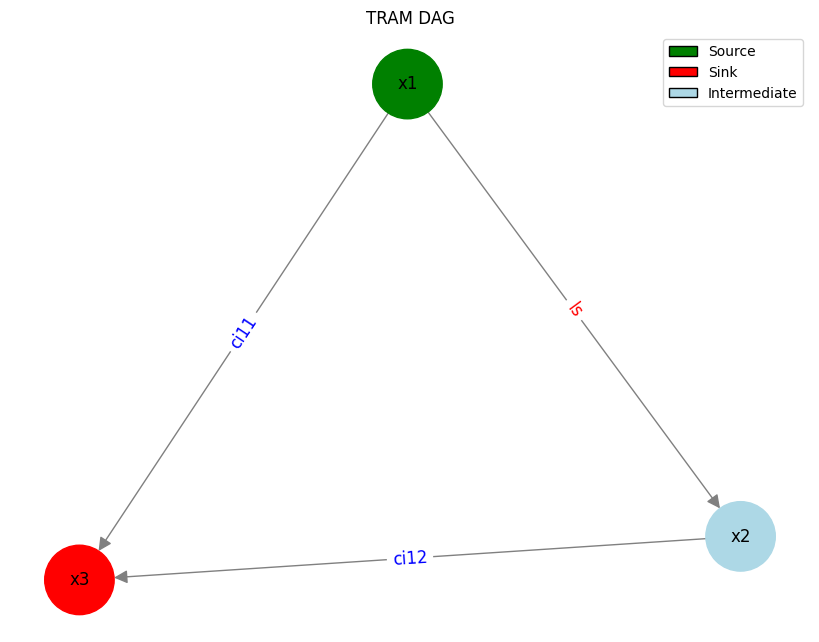

In [2]:
from utils.tramdag import TramDagConfig , TramDagModel

cfg = TramDagConfig.load("/home/bule/TramDag/dev_experiment_logs/create_configration_test/configuration.json")
cfg.plot_dag()

device='cpu'

In [3]:

td_model = TramDagModel.from_config(cfg, set_initial_weights=False,verbose=True,debug=False,device=device,initial_data = train_df) 

In [6]:
td_model.fit(train_df, val_df,
             epochs=50,batch_size=1_000,
             verbose=False,debug=False,
             device=device,
             prefetch_factor=8,
             persistent_workers=False,
             num_workers=8,
             train_mode = "parallel",
             use_precomputed=False)#,

[WARNING] 'num_workers' is ignored in parallel mode (disabled to prevent nested multiprocessing).
[WARNING] 'persistent_workers' is ignored in parallel mode (disabled to prevent nested multiprocessing).
[WARNING] 'prefetch_factor' is ignored in parallel mode (disabled to prevent nested multiprocessing).


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


KeyboardInterrupt: 

[INFO] Final latent DataFrame shape: (80000, 6)


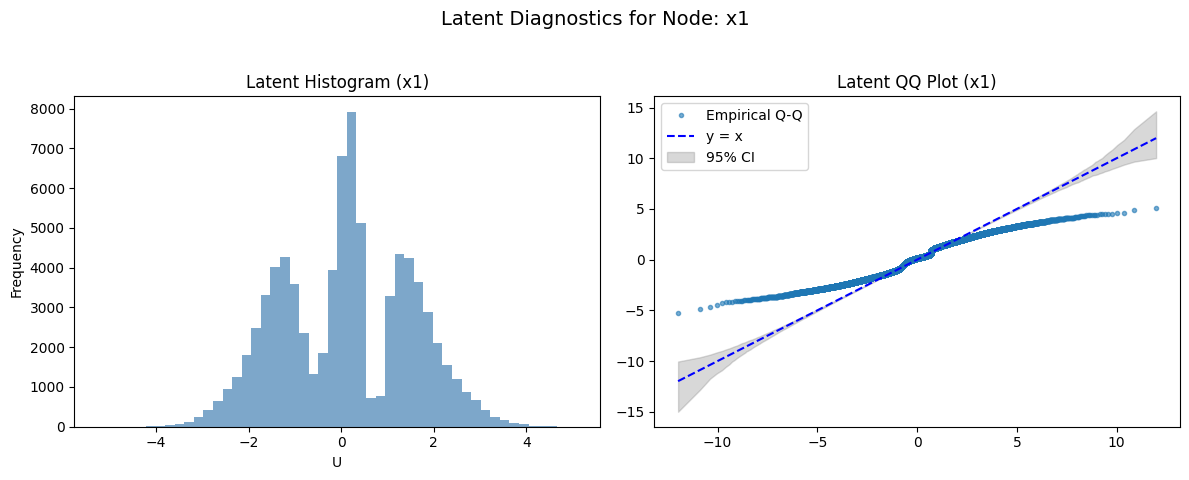

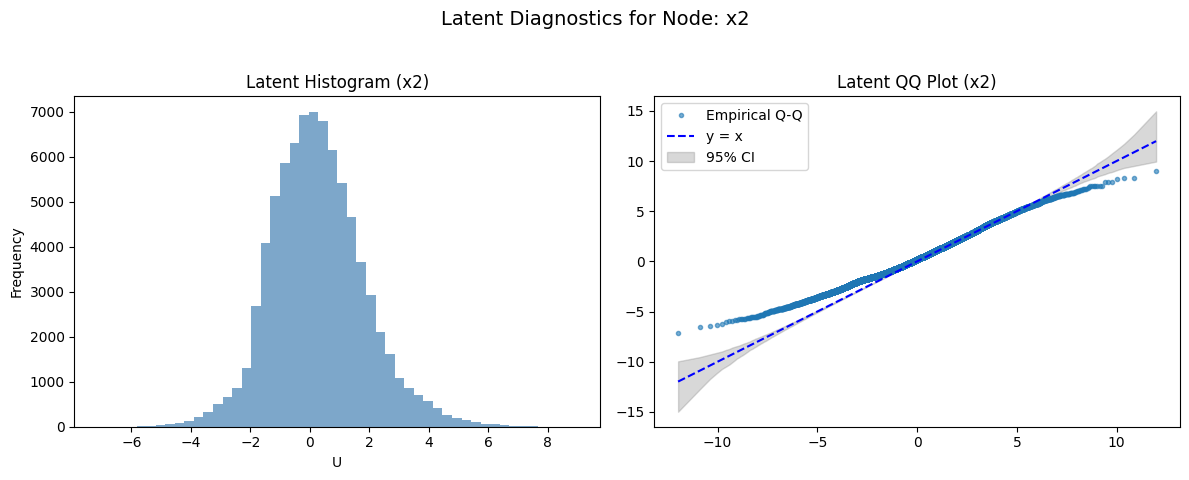

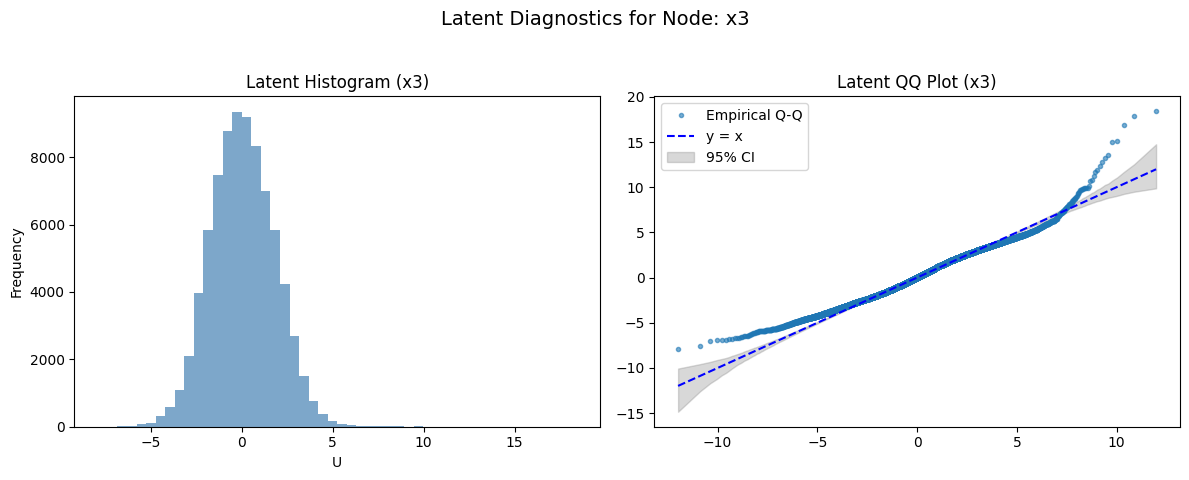

In [ ]:
td_model.show_latents( train_df)

In [ ]:
latents_df = td_model.get_latent(train_df)

[INFO] Final latent DataFrame shape: (80000, 6)


In [ ]:
samples, latents = td_model.sample(number_of_samples=5000)

[DEBUG] sample(): device: cpu
[INFO] Starting full DAG sampling with 5000 samples per node.
[DEBUG] sample_full_dag: device: cpu
[INFO] Deleting all previously sampled data.
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/create_configration_test/x1/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/create_configration_test/x2/sampling
Directory does not exist: /home/bule/TramDag/dev_experiment_logs/create_configration_test/x3/sampling

----*----------*-------------*--------Sample Node: x1 ------------*-----------------*-------------------*--
[INFO] Sampling new latents for node x1 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(5000, 1)
[WARNING] target_col 'x1' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x1' not found in DataFrame colum

Chandrupatla root finding: 100%|██████████| 10000/10000 [01:50<00:00, 90.40it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([5000])
[INFO] Completed sampling for node 'x1'

----*----------*-------------*--------Sample Node: x2 ------------*-----------------*-------------------*--
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test/x1/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test/x1/sampling
[INFO] Sampling new latents for node x2 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pandas.core.frame.DataFrame'>, shape=(5000, 1)
[WARNING] target_col 'x2' not in DataFrame columns — is this intended to be used as a Sampler?
[DEBUG] target_col 'x2' not found in DataFrame columns
[DEBUG] Set all_nodes_dict: type=<class 'dict'>, keys=['x1', 'x2', 'x3']

[DEBUG] sample_continous_modelled_target: node has parents, previously sampled data is loaded for each pa(node)
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([5000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([5000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([5000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [01:49<00:00, 91.16it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([5000])
[INFO] Completed sampling for node 'x2'

----*----------*-------------*--------Sample Node: x3 ------------*-----------------*-------------------*--
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test/x1/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test/x1/sampling
[DEBUG] check_sampled_and_latents: Found 'sampled.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test/x2/sampling
[DEBUG] check_sampled_and_latents: Found 'latents.pt' in /home/bule/TramDag/dev_experiment_logs/create_configration_test/x2/sampling
[INFO] Sampling new latents for node x3 from standard logistic distribution
[DEBUG] get_fully_specified_tram_model(): device: cpu
[DEBUG] default_number_thetas for continuous outcomes: 20
[DEBUG] Set df: type=<class 'pan

[DEBUG] sample_continous_modelled_target: node has parents, previously sampled data is loaded for each pa(node)
[DEBUG] sample_continous_modelled_target: shift_out was None; defaulting to zeros.
[DEBUG] sample_continous_modelled_target: beginning root finding
[DEBUG] sample_continous_modelled_target: thetas_expanded shape: torch.Size([5000, 20])
[DEBUG] sample_continous_modelled_target: shifts shape: torch.Size([5000])
[DEBUG] sample_continous_modelled_target: latent_sample shape: torch.Size([5000])


Chandrupatla root finding: 100%|██████████| 10000/10000 [01:44<00:00, 95.46it/s]

[DEBUG] sample_continous_modelled_target: root finding complete. Sampled shape: torch.Size([5000])
[INFO] Completed sampling for node 'x3'
[INFO] DAG sampling completed successfully for all nodes.
